In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [8]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1217b4cfecb64d5692a1f3dbf739ae1c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='huOZzRRC39svrVdGdhYjXJjVX_89DvZGKYvOZ9iUFFT8',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1217b4cfecb64d5692a1f3dbf739ae1c.get_object(Bucket='abc-donotdelete-pr-mogsbstxe6vszh',Key='Online Retail.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
data = df_data_0
data.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [9]:
filtered_data = data[['Country','CustomerID']].drop_duplicates()

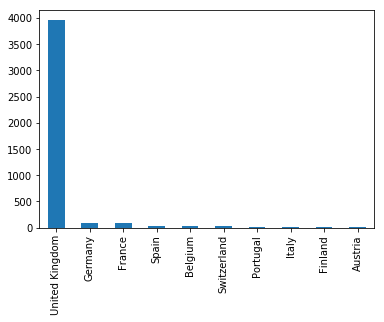

In [14]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [15]:
uk_data = data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      495478 non-null object
StockCode      495478 non-null object
Description    494024 non-null object
Quantity       495478 non-null int64
InvoiceDate    495478 non-null datetime64[ns]
UnitPrice      495478 non-null float64
CustomerID     361878 non-null float64
Country        495478 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [20]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [33]:
#filter quantities greater than zero
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 6 columns):
CustomerID        354345 non-null float64
Quantity          486286 non-null int64
UnitPrice         486286 non-null float64
InvoiceDate       486286 non-null datetime64[ns]
InvoiceNo         486286 non-null object
Total Purchase    486286 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 26.0+ MB


In [26]:
#filter out the needed columns
uk_data = uk_data[['CustomerID','Quantity','UnitPrice','InvoiceDate','InvoiceNo']]

In [40]:
#Calculate  total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [41]:
#Calculating the Number of days, Transactions< Units and Money Spent.
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

In [42]:
uk_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [46]:
#Changing names of Columns
uk_data_group.columns = ['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [47]:
#CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
#Customer Value = Average Order Value * Purchase Frequency

#To calculate Average order value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

In [48]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [49]:
#Calculate Purchase Frequency

purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

In [50]:
#Calculate Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

In [51]:
#Calculate Churn Rate
churn_rate=1-repeat_rate

In [52]:
purchase_frequency,repeat_rate,churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

In [53]:
# Calculate the Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05

In [54]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


In [55]:
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate

In [56]:
#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']

In [57]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


In [58]:
#Prediction Model for CLTV
#Let's build the CLTV prediction model.
uk_data.head()

,CustomerID,Quantity,UnitPrice,InvoiceDate,InvoiceNo,Total Purchase,TotalPurchase
0,17850.0,6,2.55,2010-12-01 08:26:00,536365,15.30,15.30
1,17850.0,6,3.39,2010-12-01 08:26:00,536365,20.34,20.34
2,17850.0,8,2.75,2010-12-01 08:26:00,536365,22.00,22.00
3,17850.0,6,3.39,2010-12-01 08:26:00,536365,20.34,20.34
4,17850.0,6,3.39,2010-12-01 08:26:00,536365,20.34,20.34


In [59]:
#Extract month and year from InvoiceDate.
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

In [60]:
uk_data.head()

,CustomerID,Quantity,UnitPrice,InvoiceDate,InvoiceNo,Total Purchase,TotalPurchase,month_yr
0,17850.0,6,2.55,2010-12-01 08:26:00,536365,15.30,15.30,Dec-2010
1,17850.0,6,3.39,2010-12-01 08:26:00,536365,20.34,20.34,Dec-2010
2,17850.0,8,2.75,2010-12-01 08:26:00,536365,22.00,22.00,Dec-2010
3,17850.0,6,3.39,2010-12-01 08:26:00,536365,20.34,20.34,Dec-2010
4,17850.0,6,3.39,2010-12-01 08:26:00,536365,20.34,20.34,Dec-2010


In [64]:
#The pivot table takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()

In [65]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


In [66]:
# sum all the months sales.
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [68]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,32619.36
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


In [69]:
#Selecting Feature
#Select latest 6 month as independent variable.

X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

In [74]:
#split training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [76]:
#Model Development


# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [77]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[208.50969617]
[[0.99880551 0.80381254 1.60226829 1.67433228 1.52860813 2.87959449]]


In [78]:
#How Well Does the Model Fit the data?

from sklearn import metrics

# compute the R Square for model

print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.9666074402817512


In [79]:
# Model Evaluation

# calculate MAE(Mean Absolute Error) using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate MSE(mean squared error)
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE(Root Mean Squared Error) of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 595.0282284701234
MSE 2114139.8898678957
RMSE: 1454.0082151995896
